In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Importing dataset

In [197]:
df = pd.read_csv('loan_approval_dataset.csv')

In [198]:
df.shape

(4269, 13)

EDA(Exploratory Data Analysis)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [200]:
df.columns.tolist()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

In [201]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [202]:
for x in df.columns:
    print(f'Cardinality of {x} is {df[x].nunique()}')

Cardinality of loan_id is 4269
Cardinality of no_of_dependents is 6
Cardinality of education is 2
Cardinality of self_employed is 2
Cardinality of income_annum is 98
Cardinality of loan_amount is 378
Cardinality of loan_term is 10
Cardinality of cibil_score is 601
Cardinality of residential_assets_value is 278
Cardinality of commercial_assets_value is 188
Cardinality of luxury_assets_value is 379
Cardinality of bank_asset_value is 146
Cardinality of loan_status is 2


In [182]:
# checking null values
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [183]:
# checking duplicate values
df.duplicated().sum()

0

In [206]:
catvar = []
numvar = []

for i in df.columns:
    if df[i].nunique()>6:
        numvar.append(i)
    else:
        catvar.append(i)

In [207]:
catvar

['no_of_dependents', 'education', 'self_employed', 'loan_status']

In [208]:
numvar

['loan_id',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

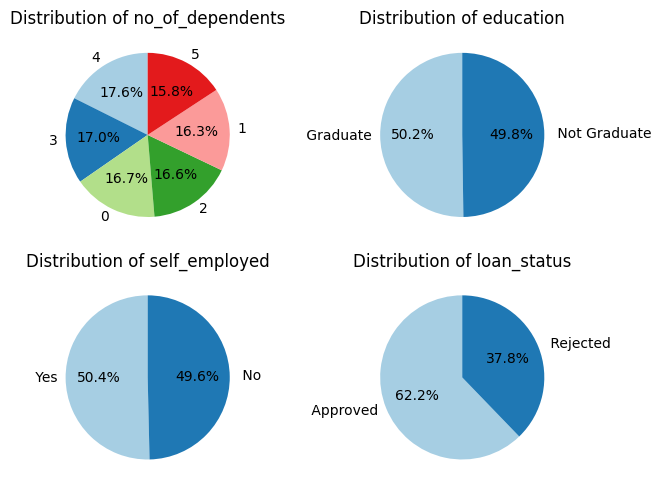

In [215]:
plt.figure(figsize=(7,5))

for i , x in enumerate(catvar,1):
    plt.subplot(2,2,i)
    dfpie = df[x].value_counts()
    plt.pie(dfpie, labels=dfpie.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"Distribution of {x}")

plt.tight_layout()

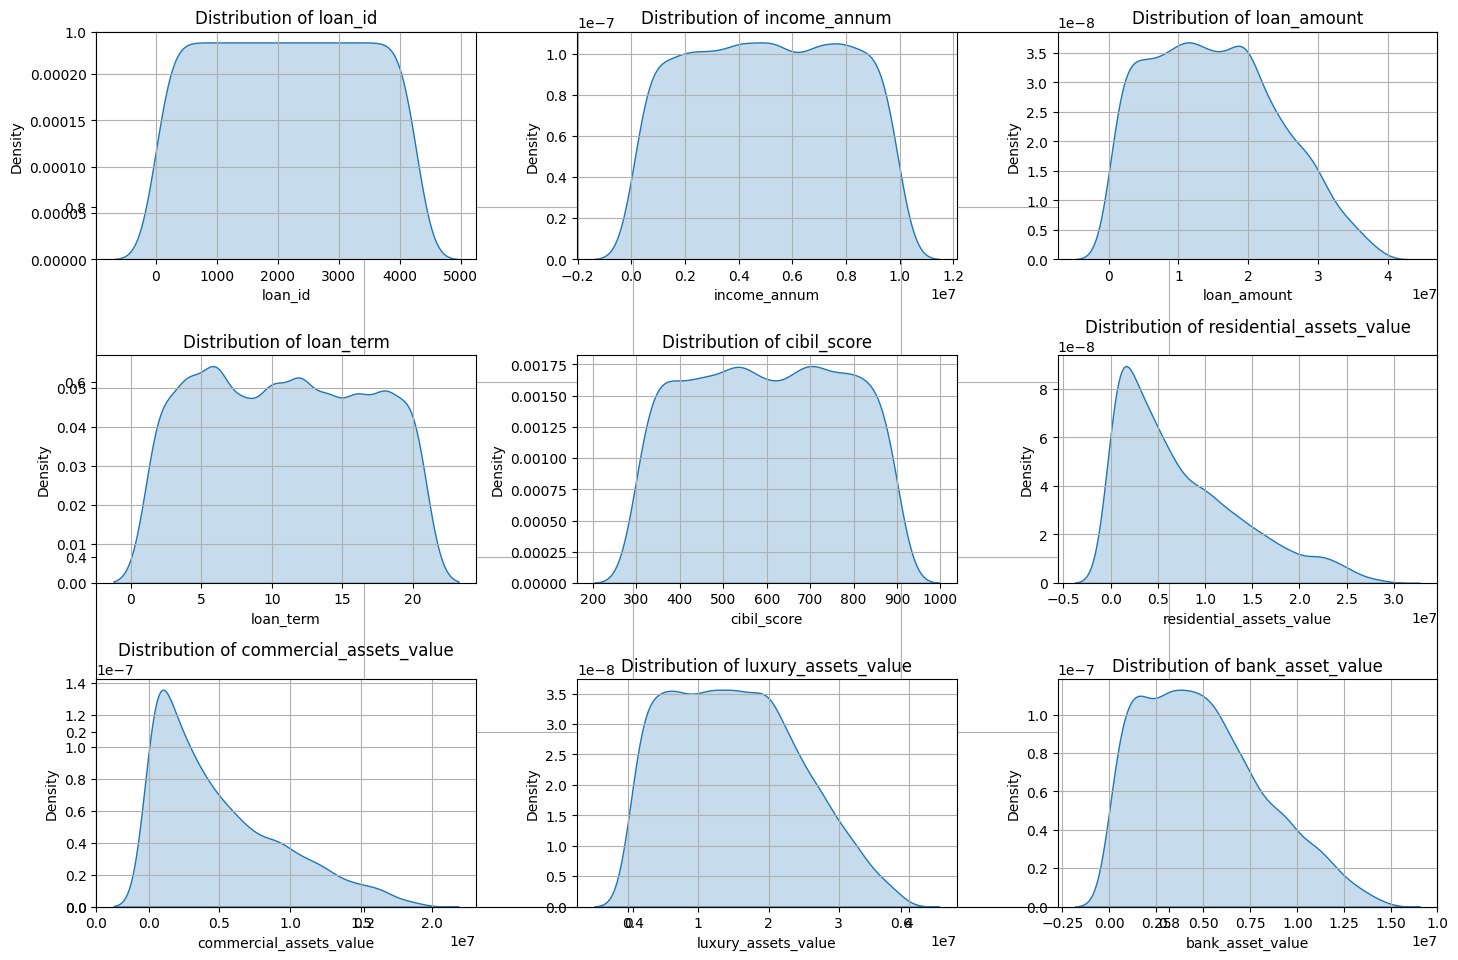

In [221]:
plt.figure(figsize=(15, 10))
plt.grid(True)

for i, x in enumerate(numvar, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x=x, fill=True)
    plt.title(f'Distribution of {x}')
    plt.grid(True)

plt.tight_layout()
plt.show()

<Axes: >

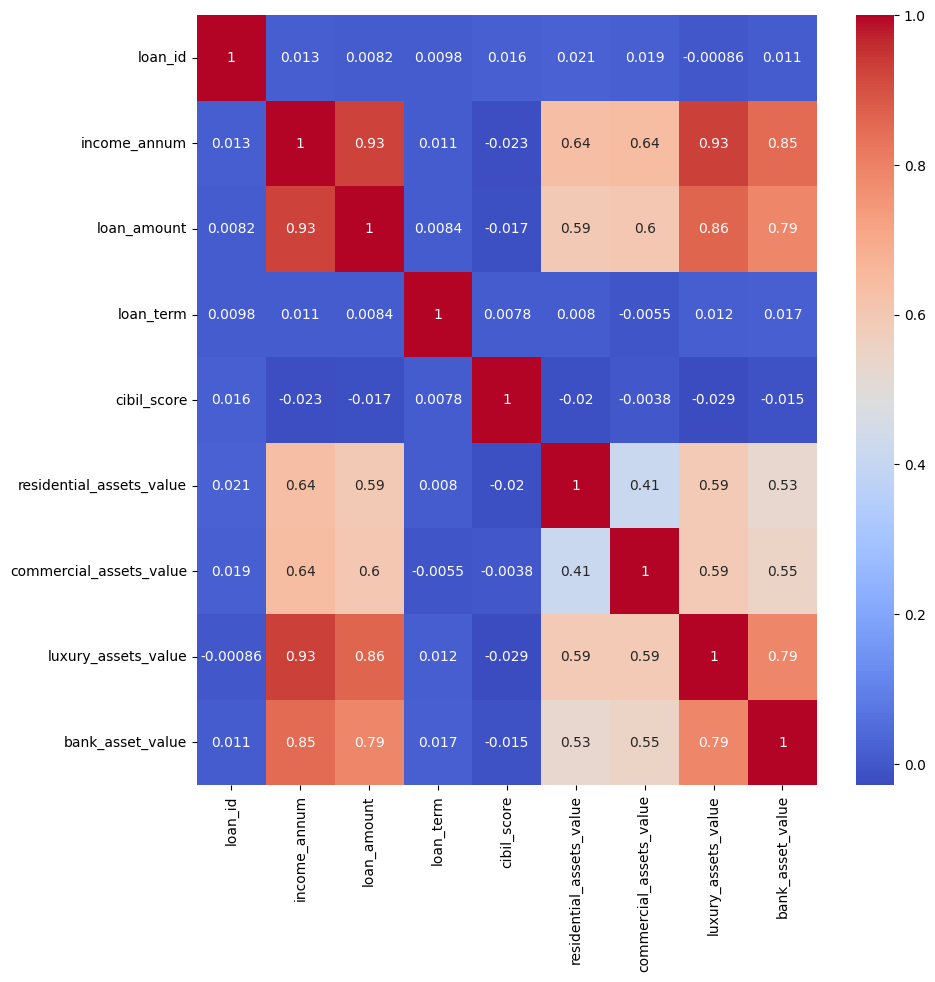

In [226]:
corr = df[numvar].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

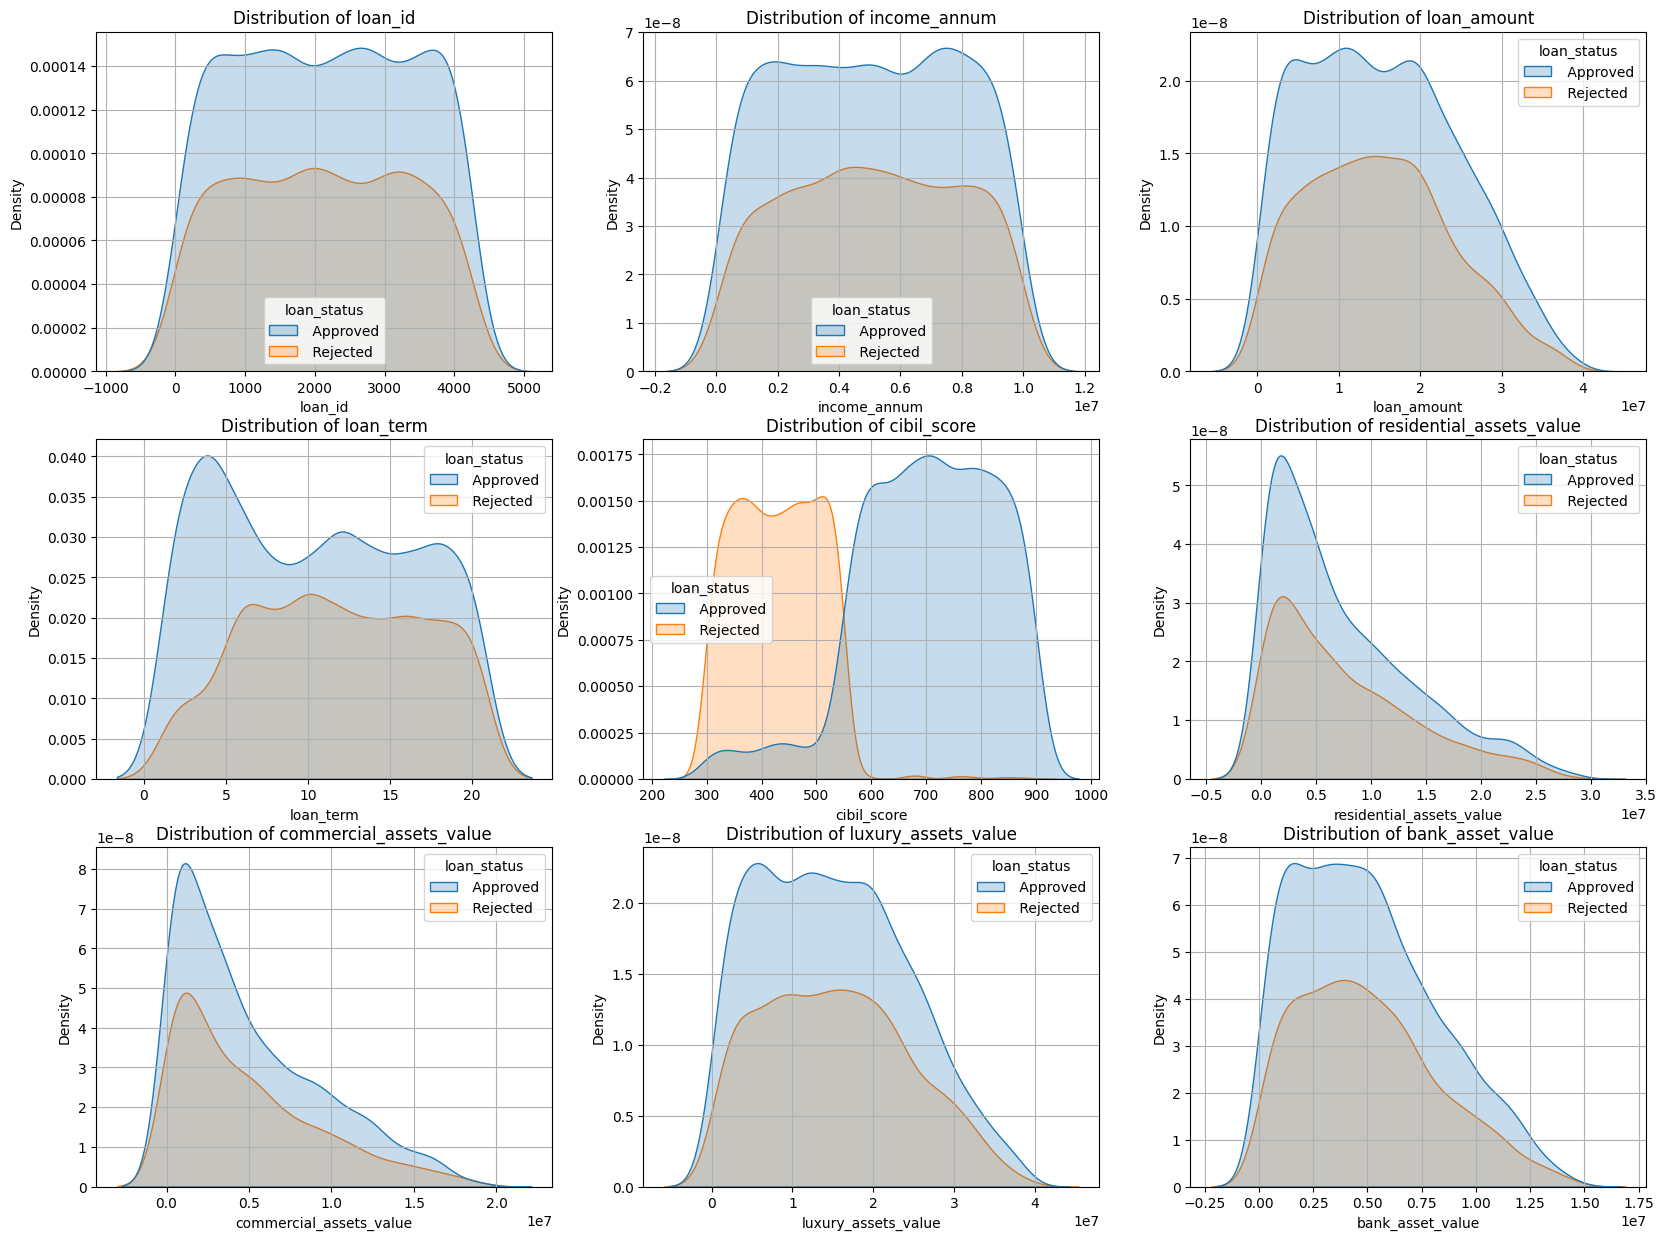

In [236]:
plt.figure(figsize=(20,15))

for i , x in enumerate(numvar , 1):
    plt.subplot(3,3,i)
    sns.kdeplot(data=df, x=x, hue='loan_status', fill=True)
    plt.title(f"Distribution of {x}")
    plt.grid(True)

plt.tight_layout
plt.show()

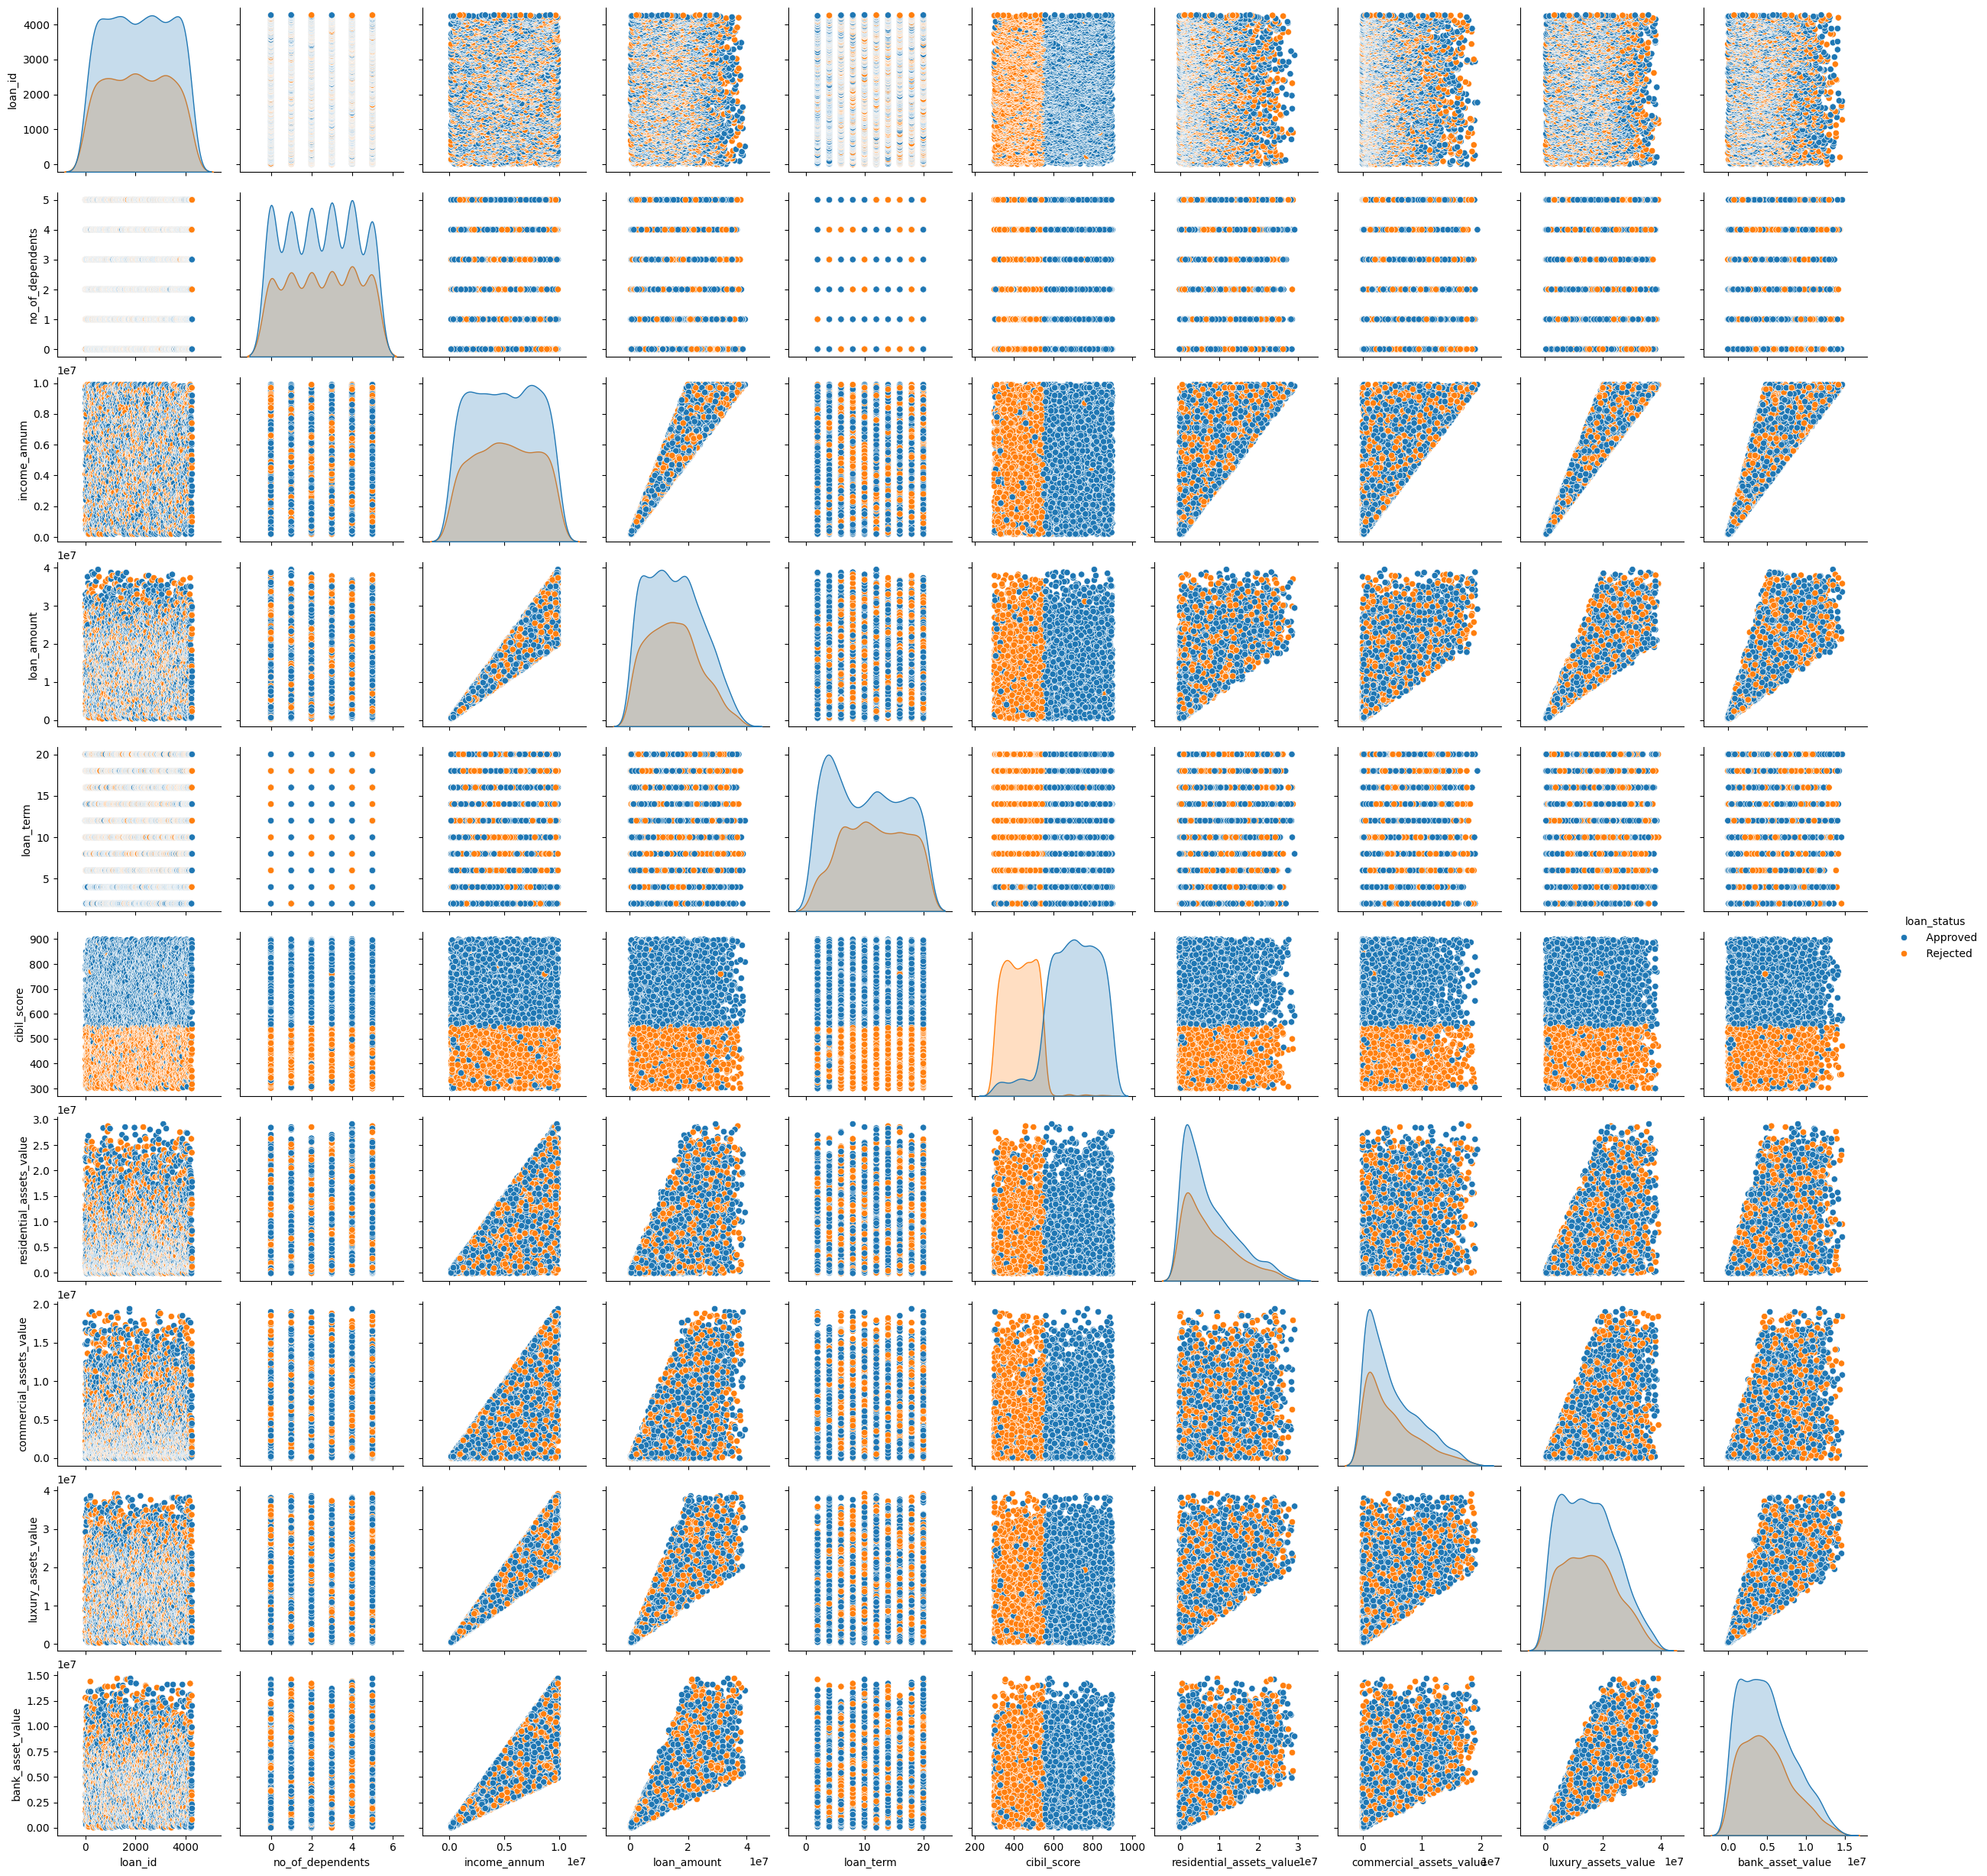

In [229]:
sns.pairplot(df,hue='loan_status')


In [245]:
cross_tab = pd.crosstab(df['loan_term'], df['loan_status'])
cross_tab['Total'] = cross_tab[' Approved'] + cross_tab[' Rejected']
cross_tab['Approved_Percentage'] = (cross_tab[' Approved'] / cross_tab['Total']) * 100
cross_tab['Rejected_Percentage'] = (cross_tab[' Rejected'] / cross_tab['Total']) * 100
cross_tab


loan_status   Approved   Rejected  Total  Approved_Percentage  \
loan_term                                                       
2                  315         89    404            77.970297   
4                  366         81    447            81.879195   
6                  282        208    490            57.551020   
8                  220        166    386            56.994819   
10                 229        207    436            52.522936   
12                 276        180    456            60.526316   
14                 239        166    405            59.012346   
16                 236        176    412            57.281553   
18                 257        165    422            60.900474   
20                 236        175    411            57.420925   

loan_status  Rejected_Percentage  
loan_term                         
2                      22.029703  
4                      18.120805  
6                      42.448980  
8                      43.005181  
10                     47.477064  
12                     39.473684  
14                     40.987654  
16                     42.718447  
18                     39.099526  
20                     42.579075